In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.iloc[0:4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [11]:
df.loc[:, "CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

Data Visualization

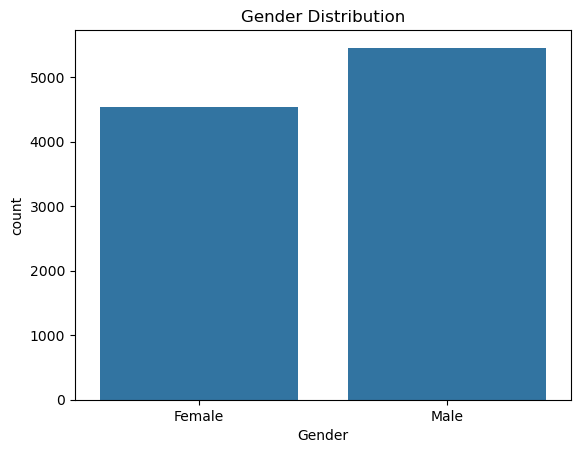

In [12]:
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

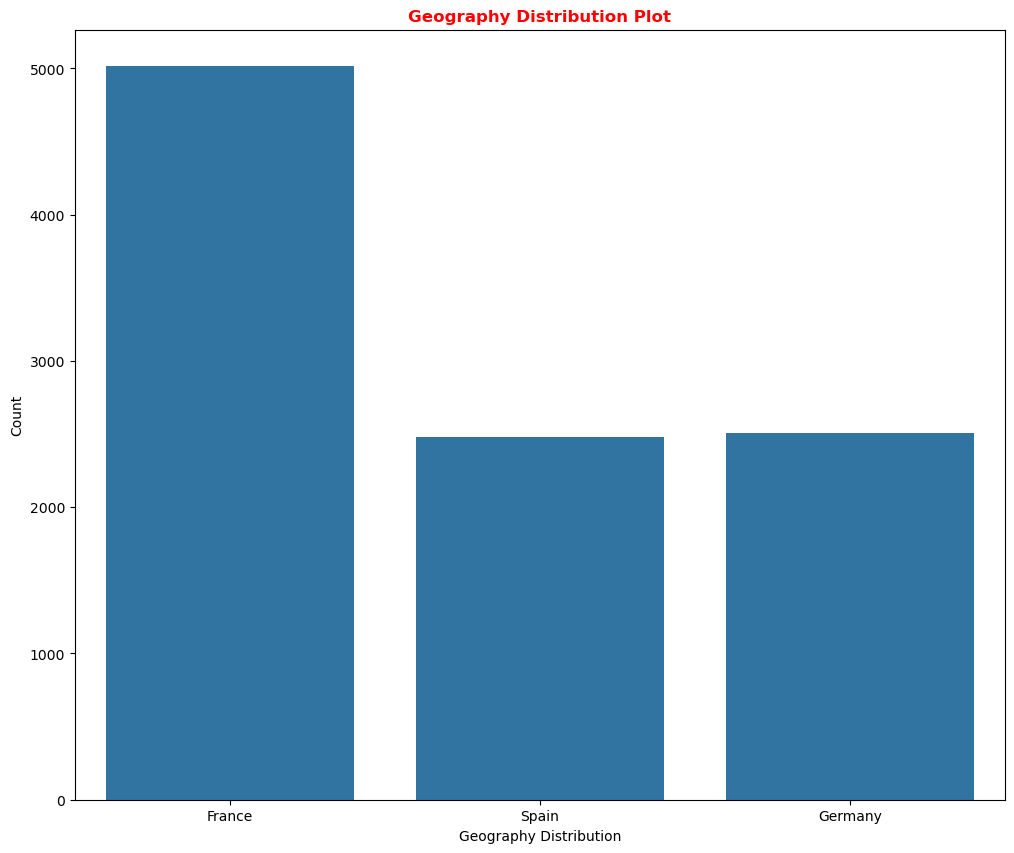

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(x="Geography", data=df)
plt.xlabel("Geography Distribution")
plt.ylabel("Count")
plt.title("Geography Distribution Plot", fontsize=12, fontweight="bold", color="red")
plt.show()

Preprocess the Data

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.drop(labels = ["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [16]:
df= pd.get_dummies(df, drop_first = True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [20]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

Train Logistic Regression Model

In [21]:
lr_model = LogisticRegression()

In [22]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [32]:
lr_pred = lr_model.predict(X_test)

In [37]:
print("Logistic Regression Model: ")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision_score:", precision_score(y_test, lr_pred))
print("f1_score:", f1_score(y_test, lr_pred))
print("recall_score:", recall_score(y_test, lr_pred))
print("r2_score:", r2_score(y_test, lr_pred))

Logistic Regression Model: 
[[2318   98]
 [ 468  116]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

Accuracy: 0.8113333333333334
Precision_score: 0.5420560747663551
f1_score: 0.2907268170426065
recall_score: 0.19863013698630136
r2_score: -0.20344960537058854


Train Random Forest Model

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=4)

In [41]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=4)

In [42]:
rf_pred = rf_model.predict(X_test)

In [44]:
print("Random Forest Model: ")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision_score:", precision_score(y_test, rf_pred))
print("f1_score:", f1_score(y_test, rf_pred))
print("recall_score:", recall_score(y_test, rf_pred))
print("r2_score:", r2_score(y_test, rf_pred))

Random Forest Model: 
[[2332   84]
 [ 313  271]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.76      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

Accuracy: 0.8676666666666667
Precision_score: 0.7633802816901408
f1_score: 0.577209797657082
recall_score: 0.464041095890411
r2_score: 0.1558842873990749


Train Gradient Boosting Model

In [45]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)

In [46]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=42)

In [48]:

gb_pred = gb_model.predict(X_test)

In [49]:
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
print("Accuracy: ", accuracy_score(y_test, gb_pred))
print("r2_Score: ", r2_score(y_test, gb_pred))
print("Precision_score: ", precision_score(y_test, gb_pred))
print("Recall_score: ", recall_score(y_test, gb_pred))
print("f1_score: ", f1_score(y_test, gb_pred))

Gradient Boosting Model:
[[2347   69]
 [ 330  254]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.43      0.56       584

    accuracy                           0.87      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000

Accuracy:  0.867
r2_Score:  0.1516318152952918
Precision_score:  0.7863777089783281
Recall_score:  0.4349315068493151
f1_score:  0.5600882028665931
